In [1]:
!pip install tensorflow
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-12-30 05:57:33.764013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-30 05:57:33.764138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-30 05:57:33.938544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.1882913750000057
GPU (s):
0.09634095999996362
GPU speedup over CPU: 22x


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
tf.__version__, hub.__version__

('2.15.0', '0.16.1')

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
import pandas as pd
labels=pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')

In [5]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [7]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

In [8]:
labels['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

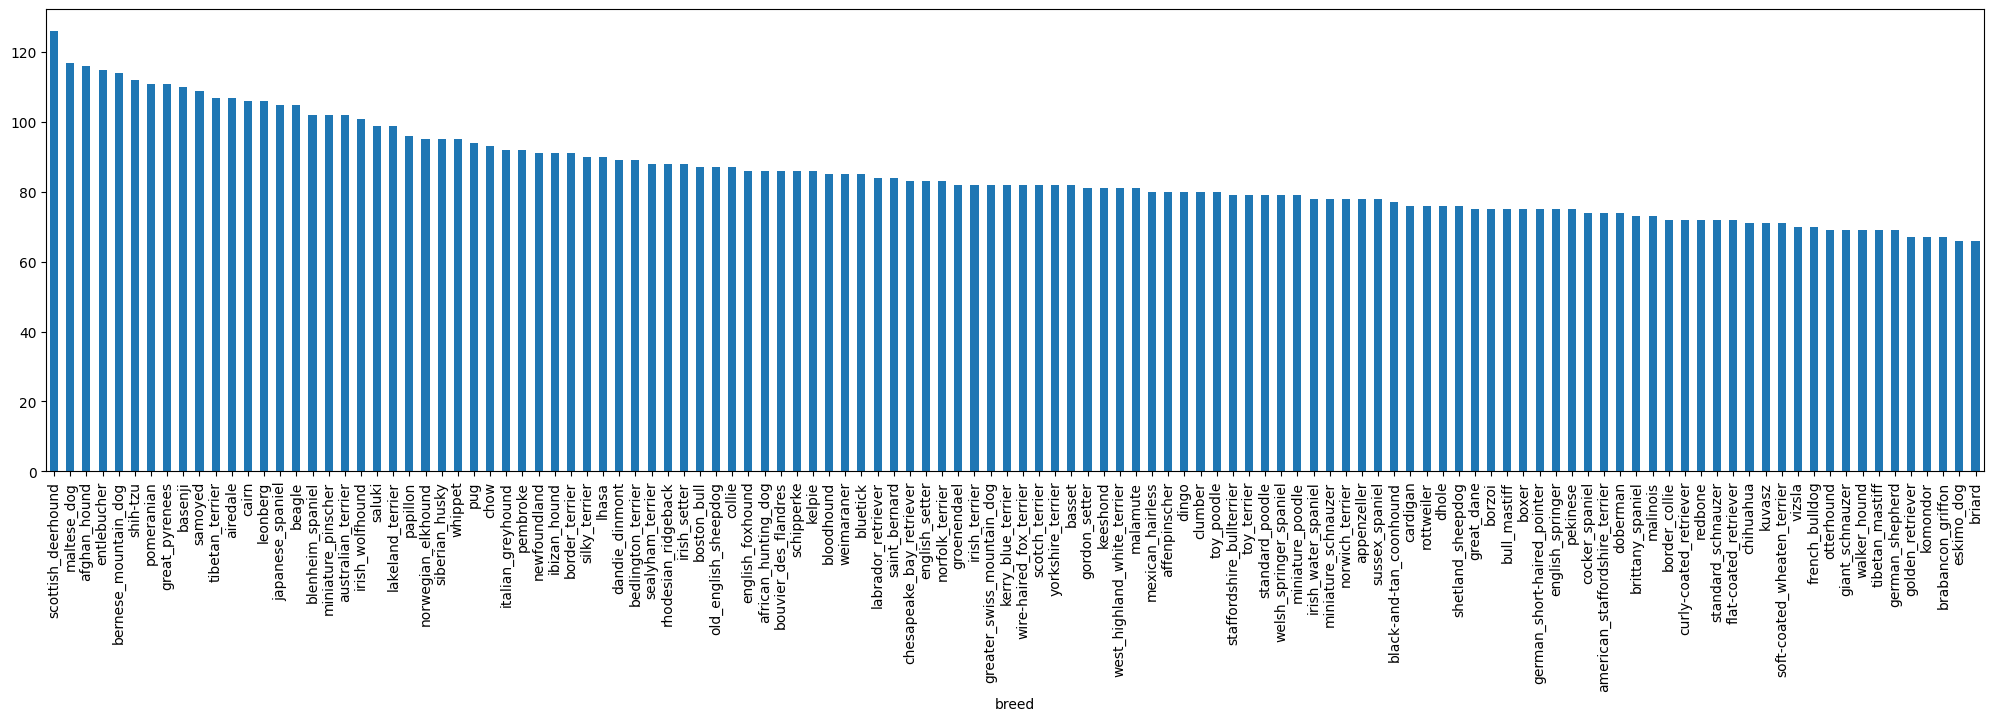

In [9]:
labels['breed'].value_counts().plot(figsize=(25,6),kind='bar');

In [10]:
labels['breed'].value_counts().mean(),labels['breed'].value_counts().median()

(85.18333333333334, 82.0)

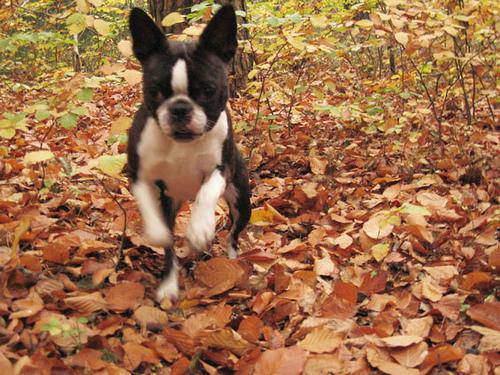

In [11]:
from IPython.display import Image
Image('/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [12]:
import os
os.listdir('/kaggle/input/dog-breed-identification/train')[:10]

['7d9c53fa846ea7e34bc3efa6830ab668.jpg',
 '04e3bb77c15c18fc1ac101d86d612f46.jpg',
 '2de892b241aeab50aad28c319eaebdbd.jpg',
 'bca88d42e4fc84b3169b13a615f5fdbf.jpg',
 '6496959bd5a27de3cb15e771ca2ae7b3.jpg',
 '51c7cc8287f557d11958afa02dd82c31.jpg',
 '4c178d8d592f1c9e8a7271946399236d.jpg',
 '0161847d5bfae154af084993fa26a1a7.jpg',
 'ad28b267501ce726440c9d5cae4e6f33.jpg',
 'f89aacf1761449fc76d665cce1399f33.jpg']

In [13]:
files=['/kaggle/input/dog-breed-identification/train/'+fname+'.jpg' for fname in labels['id']]

In [14]:
files[:10]

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/kaggle/input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/kaggle/input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/kaggle/input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/kaggle/input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/kaggle/input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [15]:
if len(files)==len(os.listdir('/kaggle/input/dog-breed-identification/train')):
    print('Ye')
else:
    print('Nay')

Ye


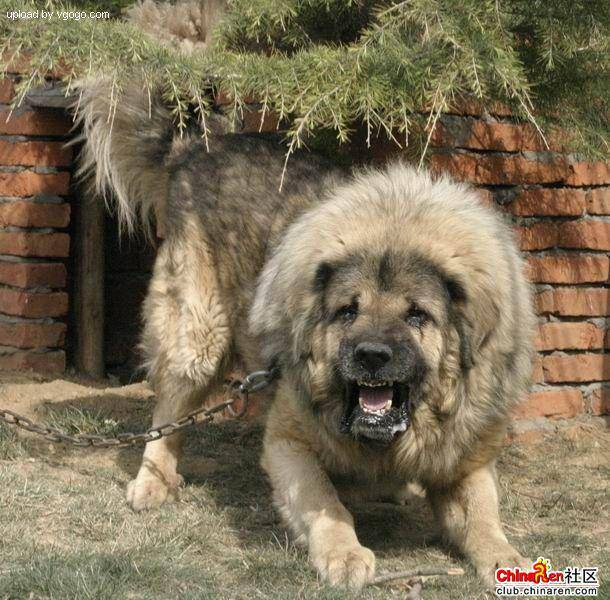

In [16]:
Image(files[9000])

In [17]:
labels.iloc[9000]

id       e20e32bf114141e20a1af854ca4d0ecc
breed                     tibetan_mastiff
Name: 9000, dtype: object

In [18]:
import numpy as np
breeds=labels['breed'].to_numpy()
# np.array(breeds)  does the same thing
breeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
if len(breeds)==len(files):
    print('Ye')
else:
    print('Nay')

Ye


In [20]:
unique_breeds=np.unique(breeds)
len(unique_breeds)

120

In [21]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
breeds[1],breeds[1]==unique_breeds
# breeds[1]==unique_breeds

('dingo',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]))

In [23]:
boolean_labels=[breed==unique_breeds for breed in breeds]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
print(breeds[2]) #prints the name of breed from the breed column in the dataframe
print(np.where(breeds[2]==unique_breeds)) #returns intex where True is returned when compared to unique_breeds
print(boolean_labels[2].argmax()) #Highest value in a boolean_label is 1 (True). Returns index of that index
boolean_labels[2].astype(int)

pekinese
(array([85]),)
85


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
len(files)

10222

In [27]:
X=files
y=boolean_labels

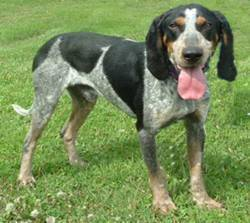

In [28]:
Image(files[13])

In [29]:
from matplotlib.pyplot import imread
image=imread(files[13])
image

array([[[122, 159,  81],
        [132, 169,  91],
        [138, 175,  97],
        ...,
        [144, 170, 109],
        [124, 153,  89],
        [124, 153,  89]],

       [[124, 161,  83],
        [125, 162,  84],
        [121, 158,  80],
        ...,
        [150, 176, 113],
        [144, 173, 109],
        [144, 173, 109]],

       [[130, 167,  89],
        [126, 163,  85],
        [119, 156,  78],
        ...,
        [151, 177, 112],
        [141, 170, 104],
        [141, 170, 104]],

       ...,

       [[129, 166,  96],
        [143, 180, 110],
        [127, 163,  91],
        ...,
        [158, 194, 104],
        [133, 169,  81],
        [122, 158,  70]],

       [[136, 176, 105],
        [128, 168,  97],
        [100, 138,  65],
        ...,
        [143, 182,  91],
        [134, 173,  84],
        [121, 161,  72]],

       [[175, 217, 145],
        [165, 207, 135],
        [143, 180, 110],
        ...,
        [127, 166,  75],
        [134, 174,  85],
        [119, 162,  72]]

In [30]:
image.shape

(223, 250, 3)

In [31]:
image[:2]

array([[[122, 159,  81],
        [132, 169,  91],
        [138, 175,  97],
        ...,
        [144, 170, 109],
        [124, 153,  89],
        [124, 153,  89]],

       [[124, 161,  83],
        [125, 162,  84],
        [121, 158,  80],
        ...,
        [150, 176, 113],
        [144, 173, 109],
        [144, 173, 109]]], dtype=uint8)

In [32]:
tf.constant(image)

<tf.Tensor: shape=(223, 250, 3), dtype=uint8, numpy=
array([[[122, 159,  81],
        [132, 169,  91],
        [138, 175,  97],
        ...,
        [144, 170, 109],
        [124, 153,  89],
        [124, 153,  89]],

       [[124, 161,  83],
        [125, 162,  84],
        [121, 158,  80],
        ...,
        [150, 176, 113],
        [144, 173, 109],
        [144, 173, 109]],

       [[130, 167,  89],
        [126, 163,  85],
        [119, 156,  78],
        ...,
        [151, 177, 112],
        [141, 170, 104],
        [141, 170, 104]],

       ...,

       [[129, 166,  96],
        [143, 180, 110],
        [127, 163,  91],
        ...,
        [158, 194, 104],
        [133, 169,  81],
        [122, 158,  70]],

       [[136, 176, 105],
        [128, 168,  97],
        [100, 138,  65],
        ...,
        [143, 182,  91],
        [134, 173,  84],
        [121, 161,  72]],

       [[175, 217, 145],
        [165, 207, 135],
        [143, 180, 110],
        ...,
        [127, 166,  7

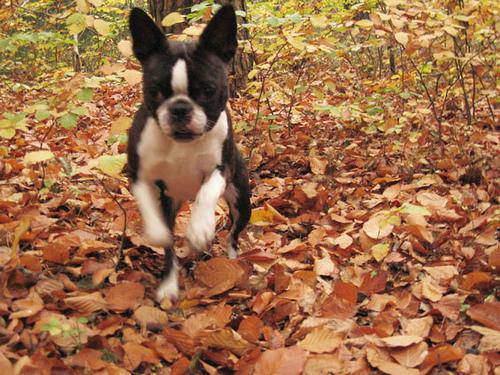

In [33]:
Image(files[0])

In [34]:
NUM_IMAGES=1000 #@param {type='slider',min=1000,max=10000,step=1000} this works in colab

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],train_size=0.8)

len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [36]:
X_train[:10],y_train[:10]

(['/kaggle/input/dog-breed-identification/train/0ab12906ac3a87b531c574a15e79c58a.jpg',
  '/kaggle/input/dog-breed-identification/train/0f1c3858495a49949934d2a635e190cf.jpg',
  '/kaggle/input/dog-breed-identification/train/153f05ef64f050530ea746a357855b20.jpg',
  '/kaggle/input/dog-breed-identification/train/008887054b18ba3c7601792b6a453cc3.jpg',
  '/kaggle/input/dog-breed-identification/train/12078d0ea135483e4bc48e2f13678588.jpg',
  '/kaggle/input/dog-breed-identification/train/1321d074e879267699d42fdca77b4004.jpg',
  '/kaggle/input/dog-breed-identification/train/123ffeb6b374097856bffdd11b693668.jpg',
  '/kaggle/input/dog-breed-identification/train/102fe645c59f482cbc771c01cfff3ff9.jpg',
  '/kaggle/input/dog-breed-identification/train/1158819241bb6eee2c1ff790a885ecf3.jpg',
  '/kaggle/input/dog-breed-identification/train/02b1c50fb7315423a664f3ce68c94e30.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,

In [37]:
#    PREPROCESSING THE IMAGE
# 1. Take image path as input
# 2. Use tf to read image into variable 
# 3. Turn that jpg into tensors
# 4. Normalise color values from 0-255 to 0-1
# 5. Resize to (224,224)
# 6. Return Modified Image

In [38]:
IMG_SIZE=224

def process_image(image_path):
    image=tf.io.read_file(image_path) #reading image into some tensor string bullshit
    image=tf.image.decode_jpeg(image,channels=3) #decoding image to tensor matrix w 3 colour channels (R,G,B)
    image=tf.image.convert_image_dtype(image, tf.float32) #normalising 0-255 to 0-1
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    
    
    return image 
    

In [39]:
image_path=files[0]
image=tf.io.read_file(image_path) #reading image
image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [40]:
tf.image.decode_jpeg(tf.io.read_file(files[3]),channels=3)

<tf.Tensor: shape=(344, 400, 3), dtype=uint8, numpy=
array([[[ 70,  66,  63],
        [ 94,  93,  89],
        [ 83,  82,  78],
        ...,
        [ 65,  69,  54],
        [ 56,  62,  48],
        [ 48,  56,  43]],

       [[ 57,  53,  50],
        [ 92,  91,  87],
        [ 91,  92,  87],
        ...,
        [ 46,  48,  34],
        [ 39,  45,  31],
        [ 41,  49,  36]],

       [[ 60,  59,  55],
        [ 96,  95,  91],
        [ 88,  89,  84],
        ...,
        [ 42,  43,  29],
        [ 45,  49,  35],
        [ 58,  64,  50]],

       ...,

       [[104,  88,  75],
        [133, 120, 104],
        [147, 134, 118],
        ...,
        [ 99,  80,  66],
        [112,  87,  82],
        [114,  89,  85]],

       [[121, 105,  92],
        [ 78,  65,  49],
        [133, 120, 104],
        ...,
        [147, 128, 114],
        [ 92,  67,  62],
        [119,  94,  90]],

       [[113,  97,  84],
        [ 98,  85,  69],
        [117, 104,  88],
        ...,
        [109,  90,  7

In [41]:
tf.io.read_file(files[0])

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [42]:
tf.image.convert_image_dtype(tf.image.decode_jpeg(tf.io.read_file(files[3]),channels=3),tf.float32)

<tf.Tensor: shape=(344, 400, 3), dtype=float32, numpy=
array([[[0.27450982, 0.25882354, 0.24705884],
        [0.36862746, 0.3647059 , 0.34901962],
        [0.3254902 , 0.32156864, 0.30588236],
        ...,
        [0.25490198, 0.27058825, 0.21176472],
        [0.21960786, 0.24313727, 0.18823531],
        [0.18823531, 0.21960786, 0.16862746]],

       [[0.22352943, 0.20784315, 0.19607845],
        [0.36078432, 0.35686275, 0.34117648],
        [0.35686275, 0.36078432, 0.34117648],
        ...,
        [0.18039216, 0.18823531, 0.13333334],
        [0.15294118, 0.1764706 , 0.12156864],
        [0.16078432, 0.19215688, 0.14117648]],

       [[0.23529413, 0.23137257, 0.21568629],
        [0.37647063, 0.37254903, 0.35686275],
        [0.34509805, 0.34901962, 0.32941177],
        ...,
        [0.16470589, 0.16862746, 0.1137255 ],
        [0.1764706 , 0.19215688, 0.13725491],
        [0.227451  , 0.2509804 , 0.19607845]],

       ...,

       [[0.40784317, 0.34509805, 0.29411766],
        [0.52

In [43]:
# GETTING TUPLE OF (IMAGE,LABEL)

def get_label(path,label):
    return process_image(path),label

In [44]:
(process_image(X[13]),tf.constant(y[13]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.47678575, 0.62188375, 0.30815828],
         [0.51782215, 0.6629202 , 0.34919468],
         [0.5327031 , 0.67780113, 0.36407563],
         ...,
         [0.56141454, 0.6717262 , 0.42188376],
         [0.49532533, 0.6122896 , 0.36130923],
         [0.48235297, 0.6       , 0.34901962]],
 
        [[0.486211  , 0.63130903, 0.31758353],
         [0.4844512 , 0.6295492 , 0.31582373],
         [0.4681175 , 0.61321557, 0.29949003],
         ...,
         [0.58139545, 0.6950981 , 0.43859532],
         [0.56051975, 0.6774841 , 0.42514732],
         [0.5563638 , 0.67768013, 0.41569197]],
 
        [[0.5086412 , 0.6537392 , 0.34776926],
         [0.48860604, 0.6337041 , 0.32773417],
         [0.4582992 , 0.60339725, 0.29742733],
         ...,
         [0.5842827 , 0.6980082 , 0.43645748],
         [0.55202645, 0.6721934 , 0.40956438],
         [0.5452294 , 0.66679543, 0.40040523]],
 
        ...,
 
        [[0.5015175 , 0.6584678 

In [45]:
BATCH_SIZE=32

def create_batch(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    #Shuffles training data
    if test_data:
        print("Creating test batches...")
        #Receives tensors and creates a dataset out of it.... only filepaths
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        print('Creating validation batches...')
        #Receives tensors of path and label, and returns batches 
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        # get_label preprocesses the image and returns (image,label) tuple
        data_batch=data.map(get_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating train batches")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data=data.shuffle(len(X))
        data_batch=data.map(get_label).batch(BATCH_SIZE)
        return data_batch
        
        
        
        
        

In [46]:
data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
list(data)

[(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg'>,
  <tf.Tensor: shape=(120,), dtype=bool, numpy=
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, 

In [47]:
train_data=create_batch(X_train,y_train)
val_data=create_batch(X_val,y_val,valid_data=True)

Creating train batches
Creating validation batches...


In [48]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [49]:
import matplotlib.pyplot as plt

def show25img(images,labels):
    plt.figure(figsize=(10,10))
    
    for i in range (25):
        ax=plt.subplot(5,5,i+1) #(rows,columns,index)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

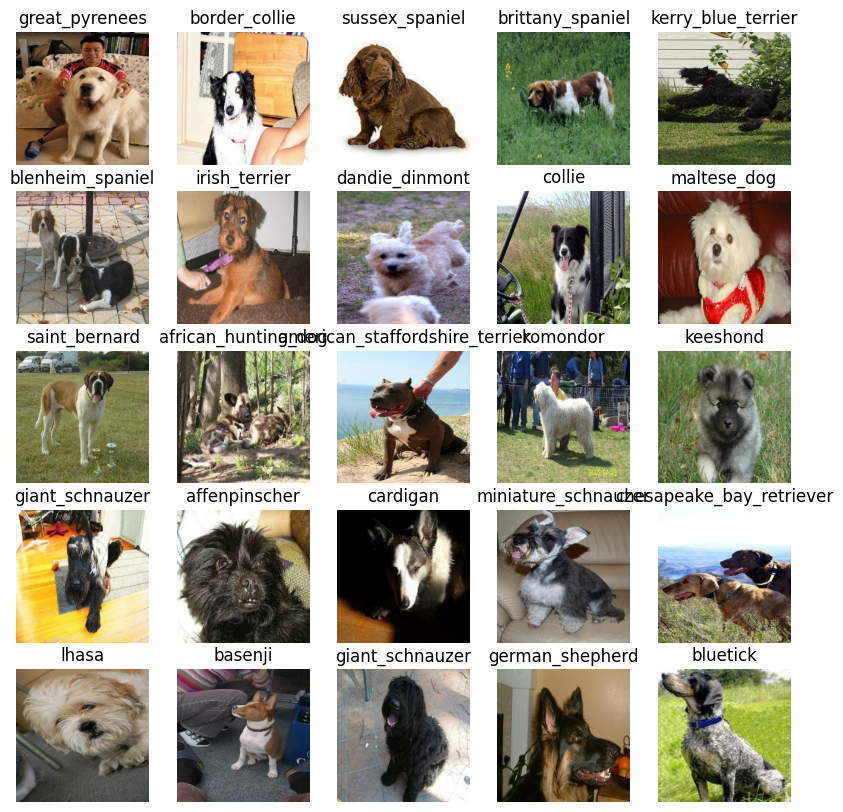

In [50]:
train_img,train_label=next(train_data.as_numpy_iterator())
# train_img
show25img(train_img,train_label) #shuffles everytime I run this... why?

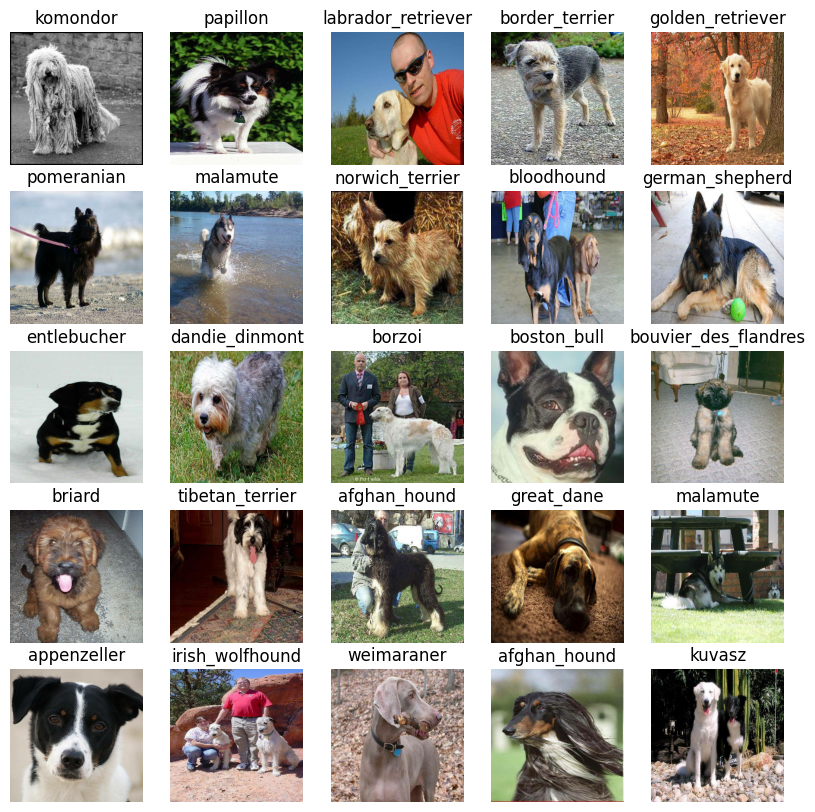

In [51]:
val_img,val_label=next(val_data.as_numpy_iterator())
show25img(val_img,val_label)

In [52]:
IMG_SIZE

224

In [53]:
INPUT_SHAPE=[0,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [54]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model=MODEL_URL):
    print("Building model with ",MODEL_URL)
    
    # Set up model layers
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") # Layer 2 (output layer)
                                 ])
    #Compile the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
    
    #Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [55]:
model=create_model()
model.summary()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (0, 1001)                 5432713   
                                                                 
 dense (Dense)               (0, 120)                  120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [56]:
os.makedirs("/kaggle/working/logs")

In [57]:
!ls

__notebook__.ipynb  logs


In [58]:
%load_ext tensorboard
import datetime

def tensorboard_callback():
    logdir = os.path.join("drive/My Drive/Data/logs",
                            # Make it so the logs get tracked whenever we run an experiment
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))    
    return tf.keras.callbacks.TensorBoard(logdir)


In [59]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [60]:
print("Ye" if tf.config.list_physical_devices("GPU") else "Nay")

Ye


In [61]:
NUM_EPOCHS=100
def train_model():
    model=create_model()
    tb=tensorboard_callback()
    
    model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[tb,early_stop])
    
    return model

In [62]:
model=train_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100


I0000 00:00:1735538295.839283      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 [==============================] - 9s 157ms/step - loss: 4.7419 - accuracy: 0.0825 - val_loss: 3.2994 - val_accuracy: 0.3050
Epoch 2/100
25/25 [==============================] - 1s 57ms/step - loss: 1.6978 - accuracy: 0.6900 - val_loss: 2.0563 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 1s 58ms/step - loss: 0.5800 - accuracy: 0.9463 - val_loss: 1.5752 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 1s 58ms/step - loss: 0.2513 - accuracy: 0.9862 - val_loss: 1.4054 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 1s 58ms/step - loss: 0.1420 - accuracy: 0.9987 - val_loss: 1.3269 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 1s 58ms/step - loss: 0.0985 - accuracy: 1.0000 - val_loss: 1.2827 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 1s 58ms/step - loss: 0.0735 - accuracy: 1.0000 - val_loss: 1.2488 - val_accuracy: 0.6350
Epoch 8/100
25/25

In [63]:
# %tensorboard --logdir /kaggle/working/logs         ##Does not work on kaggle

In [64]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 41ms/step


array([[1.55146664e-03, 7.24499971e-02, 2.10514554e-04, ...,
        3.66865599e-04, 1.72962854e-03, 4.52118507e-03],
       [1.72575878e-03, 5.40387467e-04, 4.52381733e-04, ...,
        8.56560539e-04, 3.20603931e-03, 4.93327342e-03],
       [4.65574558e-05, 8.29054698e-05, 3.38550715e-04, ...,
        8.30248289e-04, 4.40218864e-04, 1.44268151e-05],
       ...,
       [3.65254964e-04, 1.16142510e-04, 1.40649630e-04, ...,
        1.11136837e-02, 6.82908239e-06, 2.13096049e-04],
       [1.00016565e-04, 9.38822559e-05, 1.30857120e-03, ...,
        1.17243989e-03, 2.49455392e-04, 4.58449271e-04],
       [2.46505188e-05, 8.81439846e-05, 5.20032427e-06, ...,
        4.66615966e-05, 2.41647824e-04, 3.38355452e-03]], dtype=float32)

In [65]:
predictions.shape

(200, 120)

In [66]:
idx=0
print(predictions[idx])
print(f"Max value is: {np.max(predictions[idx])}")
print(f"index of max value is: {np.argmax(predictions[idx])}")
print(f"predicted breed is {unique_breeds[np.argmax(predictions[idx])]}")
# print(f"actual breed is {})

[1.55146664e-03 7.24499971e-02 2.10514554e-04 1.29095512e-03
 1.02794031e-04 9.09505645e-04 6.84477738e-04 5.53631282e-04
 5.33019518e-03 7.95313099e-05 3.29909776e-03 5.80598076e-04
 1.16931053e-03 2.64108239e-04 7.63951102e-03 3.39076412e-03
 4.30002459e-04 9.42696715e-05 1.28080917e-03 2.23641400e-04
 1.53655489e-03 1.06244450e-04 6.58813515e-05 4.64421045e-03
 6.53313997e-04 4.25579899e-04 9.29157541e-04 1.17096608e-03
 3.43179825e-04 4.90771374e-04 8.94225319e-04 6.94960123e-03
 4.55035921e-03 7.85280135e-04 6.44399028e-04 7.95155391e-03
 1.95420711e-04 1.59537757e-03 1.70347092e-04 4.46562510e-04
 3.25466593e-04 1.52821245e-04 2.72548961e-04 2.66019162e-03
 2.56976904e-03 2.03755932e-04 5.57355001e-04 1.22394203e-03
 4.26550425e-04 1.02013978e-03 9.24090913e-04 4.37427050e-04
 1.56858680e-03 2.65321904e-03 1.33560097e-03 1.68866129e-03
 1.10725733e-03 8.81852757e-04 6.90953434e-02 1.44007464e-03
 1.57523231e-04 1.48480712e-03 9.67613130e-04 9.03042906e-04
 1.02885730e-04 5.398083

In [67]:
def get_y_val(index):
    return unique_breeds[np.argmax(predictions[index])]

In [68]:
get_y_val(0)

'komondor'

In [69]:
def unbatchify(data):
    images=[]
    labels=[]
    
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(label)
    return images,labels
    

In [70]:
val_img,val_label=unbatchify(val_data)
val_label

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [71]:
def plot_pred(index):
    y_val=get_y_val(index)
    y_actual=unique_breeds[np.argmax(val_label[index])]
    img=val_img[index]
    y_prob=np.max(predictions[index])
    
    plt.imshow(img)
    plt.axis("off")
    
    if y_val==y_actual:
        color="green"
    else:
        color="red"
            
    plt.title(f"{y_val} {(y_prob*100):.2f}% ({y_actual})",color=color)
    

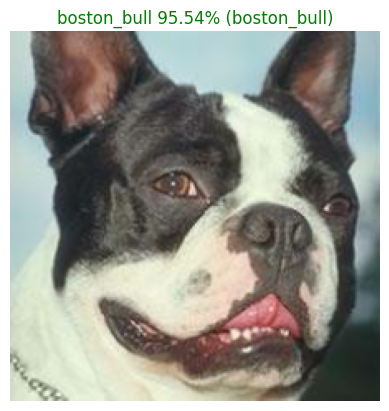

In [72]:
plot_pred(13)

In [73]:
get_y_val(1)

'papillon'

In [74]:
val_label[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [75]:
!ls

__notebook__.ipynb  drive  logs


In [76]:
def save_model(model,suffix=None):
    modeldir=os.path.join("models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
    
    model_path=modeldir+"-"+suffix+".h5"
    print(f"saving to {model_path}")
    
    model.save(model_path)
    return model_path

def load_model(model_path):
    print(f"loading from {model_path}")
    
    model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    
    return model

In [77]:
# save_model(model,"1000-mobilenetV2-Adam")
model.save("models/1000-mobilenetV2-Adam.h5", overwrite=True)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
yoyo=load_model("/kaggle/working/models/1000-mobilenetV2-Adam.h5")

loading from /kaggle/working/models/1000-mobilenetV2-Adam.h5


In [79]:
yoyo.evaluate(val_data)

7/7 [==============================] - 1s 50ms/step - loss: 1.1890 - accuracy: 0.6550


[1.1889532804489136, 0.6549999713897705]

In [80]:
len(X)

10222

In [81]:
len(y)

10222

In [82]:
full_data=create_batch(X,y)
full_data


Creating train batches


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [83]:
full_model=create_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [84]:
full_model_tb=tensorboard_callback()
full_model_stop=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)

In [85]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tb,full_model_stop])

Epoch 1/100
320/320 [==============================] - 29s 79ms/step - loss: 1.3353 - accuracy: 0.6714
Epoch 2/100
320/320 [==============================] - 15s 46ms/step - loss: 0.4023 - accuracy: 0.8824
Epoch 3/100
320/320 [==============================] - 15s 46ms/step - loss: 0.2351 - accuracy: 0.9382
Epoch 4/100
320/320 [==============================] - 15s 47ms/step - loss: 0.1521 - accuracy: 0.9641
Epoch 5/100
320/320 [==============================] - 15s 47ms/step - loss: 0.1060 - accuracy: 0.9788
Epoch 6/100
320/320 [==============================] - 15s 47ms/step - loss: 0.0779 - accuracy: 0.9857
Epoch 7/100
320/320 [==============================] - 15s 47ms/step - loss: 0.0584 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 15s 47ms/step - loss: 0.0460 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 15s 46ms/step - loss: 0.0359 - accuracy: 0.9973
Epoch 10/100
320/320 [==============================] - 15s 47ms/step - l

In [86]:
# save_model(full_model,"full_trained-mobilenetV2-Adam")
full_model.save("models/full_trained_mobilenetV2-Adam.h5", overwrite=True)

In [87]:
test_path="/kaggle/input/dog-breed-identification/test/"
test_file=[test_path + fname for fname in os.listdir(test_path)]

In [88]:
test_file[:10]

['/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '/kaggle/input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '/kaggle/input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '/kaggle/input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg',
 '/kaggle/input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg',
 '/kaggle/input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg',
 '/kaggle/input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg',
 '/kaggle/input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg',
 '/kaggle/input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg']

In [89]:
len(test_file)

10357

In [90]:
test_data=create_batch(test_file,test_data=True)

Creating test batches...


In [91]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [92]:
test_predictions=full_model.predict(test_data,verbose=1)

324/324 [==============================] - 27s 83ms/step


In [93]:
test_predictions[:10]

array([[4.16365423e-12, 9.57152906e-15, 1.14381116e-10, ...,
        1.05384238e-07, 1.40529645e-11, 9.53179619e-11],
       [1.77885770e-15, 1.24669677e-10, 4.15711616e-15, ...,
        9.06012210e-10, 3.43179024e-14, 5.94823254e-15],
       [1.85958835e-11, 9.55030282e-06, 5.37915490e-10, ...,
        2.01871337e-08, 1.20745306e-13, 2.97703973e-13],
       ...,
       [1.60942371e-09, 2.37004216e-09, 5.38059289e-13, ...,
        2.51277221e-10, 1.29059556e-14, 1.50347247e-14],
       [1.43419275e-05, 6.22214529e-08, 1.06065306e-06, ...,
        2.08310418e-08, 1.29744660e-06, 1.95109635e-08],
       [1.70877712e-09, 1.23964228e-09, 3.83196287e-11, ...,
        1.38077480e-10, 1.09379363e-11, 1.24594631e-11]], dtype=float32)

In [94]:
test_predictions.shape

(10357, 120)

In [95]:
import pandas as pd
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [96]:
test_ids=[fname[:-4] for fname in os.listdir("/kaggle/input/dog-breed-identification/test")]
# test_ids=[fname[:-4] for fname in test_ids]

In [97]:
test_ids[:10]

['09e51e17e2b756ff2ace8a87bd1443fa',
 'f7a32505c12649183c5991ecfa7d68b3',
 'bc6d50ffb4644feb34530aa58943e85b',
 '7cbc041e79135a572aad87904b5c9c57',
 'f3b603f10d6a344f0395fb46b242ff8e',
 'db55098d859d27a3c05b0e3fc41d43e7',
 '665bab06a3ea861c0812c778486988e3',
 '7b57911ea7559cebd6db308125926642',
 'df0d6ba158287cb2b3ed6459a22d42ba',
 'b80d89ad4a17ac2537ff46d251efcd7c']

In [98]:
preds_df["id"]=test_ids
preds_df.head()

id affenpinscher afghan_hound  \
0  09e51e17e2b756ff2ace8a87bd1443fa           NaN          NaN   
1  f7a32505c12649183c5991ecfa7d68b3           NaN          NaN   
2  bc6d50ffb4644feb34530aa58943e85b           NaN          NaN   
3  7cbc041e79135a572aad87904b5c9c57           NaN          NaN   
4  f3b603f10d6a344f0395fb46b242ff8e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [99]:
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  09e51e17e2b756ff2ace8a87bd1443fa   4.163654e-12  9.571529e-15   
1  f7a32505c12649183c5991ecfa7d68b3   1.778858e-15  1.246697e-10   
2  bc6d50ffb4644feb34530aa58943e85b   1.859588e-11  9.550303e-06   
3  7cbc041e79135a572aad87904b5c9c57   2.362018e-11  6.738064e-14   
4  f3b603f10d6a344f0395fb46b242ff8e   1.584740e-15  1.242910e-14   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.143811e-10  1.708189e-10                    3.510282e-02   
1         4.157116e-15  2.554902e-13                    4.577864e-11   
2         5.379155e-10  2.191585e-08                    4.713842e-09   
3         9.026312e-15  6.541695e-12                    4.006142e-08   
4         6.279446e-15  2.434761e-11                    9.948958e-15   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.935615e-13        2.346152e-09  8.546505e-09  1.047142e-12  ...   
1  2.292269e-11        6.419466e-11  1.004115e-10  2.042282e-10  ...   
2  9.770419e-11        6.337052e-12  2.370310e-12  2.736030e-10  ...   
3  1.441822e-08        2.058963e-11  5.785404e-12  2.768214e-14  ...   
4  1.140895e-11        4.520154e-12  1.554902e-13  4.271370e-11  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.598260e-09  3.489457e-08  1.013594e-10  5.447708e-10  1.375137e-13   
1  6.541679e-13  1.224876e-13  1.495553e-07  1.191131e-08  3.285399e-13   
2  3.476031e-11  1.359773e-13  6.858712e-14  3.966893e-10  3.262506e-09   
3  2.706244e-11  6.112068e-10  4.450621e-12  8.802120e-13  2.200264e-05   
4  2.217179e-15  7.304017e-14  5.847693e-13  1.251529e-13  4.650599e-16   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            5.532396e-15                 6.388969e-10  1.053842e-07   
1            1.700984e-13                 1.263957e-15  9.060122e-10   
2            2.635860e-10                 1.688232e-14  2.018713e-08   
3            2.844256e-15                 2.190448e-13  2.126822e-06   
4            9.999977e-01                 6.212165e-14  3.222434e-15   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.405296e-11       9.531796e-11  
1             3.431790e-14       5.948233e-15  
2             1.207453e-13       2.977040e-13  
3             1.416438e-10       7.831415e-12  
4             1.175341e-14       5.641220e-15  

[5 rows x 121 columns]

In [100]:
preds_df.to_csv("submission.csv",index=False)

In [101]:
preds_df.shape

(10357, 121)